<a href="https://colab.research.google.com/github/jakew4/sales-predictions/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction Project
Jacob Wang

## Loading Data

In [16]:
# Part 1 - Loading data, importing libraries, previewing data

import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [5]:
## Part 2 - Data Cleaning
# 1. Display # of rows and columns
df.shape

(8523, 12)

Looks like there are  8523 rows, 12 columns

In [6]:
# 2. Determine data types of all columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# 3. Find and drop all duplicates
df.duplicated().sum()

0

Looks like there are NO duplicates

In [8]:
# 4. Identify missing values:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5 - Decide how to address missing values:
 For the 'Item_Weight' missing values I will insert the average of the existing item weights. Item weights are missing a significant amount of data, but that data seems too relevant to remove and only affects 1463 entries out of over 8500. Roughly estimating these values shouldn't affect our data too adversely. For the missing entries in 'Outlet_Size' I will simply fill in 'Missing' where there is missing data. The data affects roughly 30% of the data, which is significant, however we still have a column 'Outlet_Type' which contains similar information with no missing entries. 

In [9]:
# 5. Fill in 'Outlet_Size' column with 'Missing' where there is missing data:

df['Outlet_Size'].fillna('Missing', inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# 5. Insert the avg 'Item_Weight' where we have missing data: 

avg_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(avg_weight, inplace = True)

In [11]:
# 6. Confirm there are no missing values:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Confirmed

In [12]:
# 7. Find and fix any inconsistent categories of data
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
# 7. Find and fix any inconsistent categories of data

df['Outlet_Type'].value_counts()
df['Outlet_Location_Type'].value_counts()
df['Outlet_Identifier'].value_counts()

df['Item_Fat_Content'].value_counts()
# 'Item_Fat_Content' contains some inconsistencies. 

df['Outlet_Establishment_Year'].value_counts()
df['Item_Type'].value_counts()
df['Item_Outlet_Sales'].value_counts()
df['Outlet_Size'].value_counts()
df['Item_Visibility'].value_counts()
# Could not locate any other inconsistencies. 

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [30]:
# 7. Fix 'Item_Fat_Content' column 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

## Much better

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
# 8. Obtain summary stats for each numerical column
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

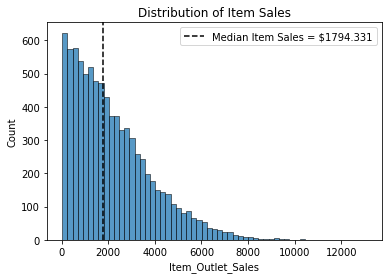

In [18]:
# Create histograms to view distributions of various features in the dataset 
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')
median = df['Item_Outlet_Sales'].median()
ax.set(title = 'Distribution of Item Sales')
ax.axvline(median, color = 'black', linestyle = '--', 
            label = f'Median Item Sales = ${median}')
ax.legend();

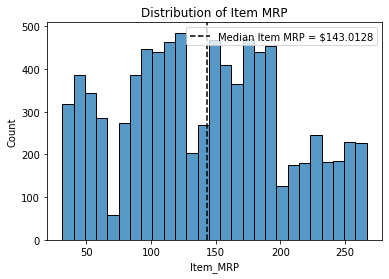

In [19]:
# Create histograms to view distributions of various features in the dataset 
ax = sns.histplot(data = df, x = 'Item_MRP')
median = df['Item_MRP'].median()
ax.set(title = 'Distribution of Item MRP')
ax.axvline(median, color = 'black', linestyle = '--', 
            label = f'Median Item MRP = ${median}')
ax.legend();

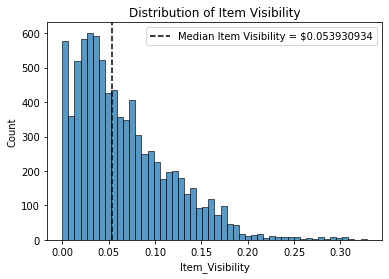

In [20]:
# Create histograms to view distributions of various features in the dataset 
ax = sns.histplot(data = df, x = 'Item_Visibility')
median = df['Item_Visibility'].median()
ax.set(title = 'Distribution of Item Visibility')
ax.axvline(median, color = 'black', linestyle = '--', 
            label = f'Median Item Visibility = ${median}')
ax.legend();

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

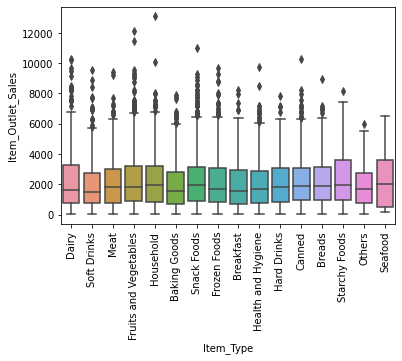

In [23]:
# Create boxplots to view statistical summaries of Item_Type and Item_Outlet_Sales
sns.boxplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = df)
plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

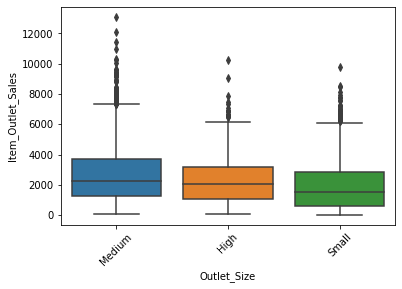

In [26]:
# Create boxplots to view statistical summaries of Outlet_Size and Item_Outlet_Sales
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

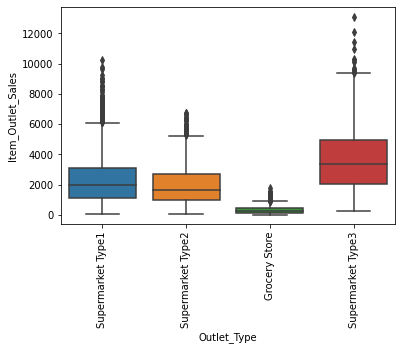

In [27]:
# Create boxplots to view statistical summaries of Outlet_Type and Item_Outlet_Sales
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = df)
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

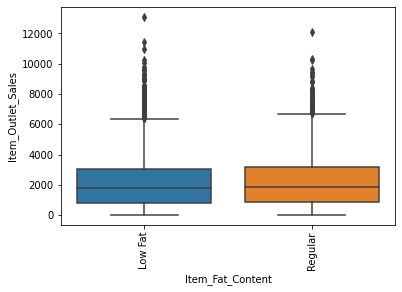

In [31]:
# Create boxplots to view statistical summaries of Item_Fat_Content and Item_Outlet_Sales
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df)
plt.xticks(rotation = 90)

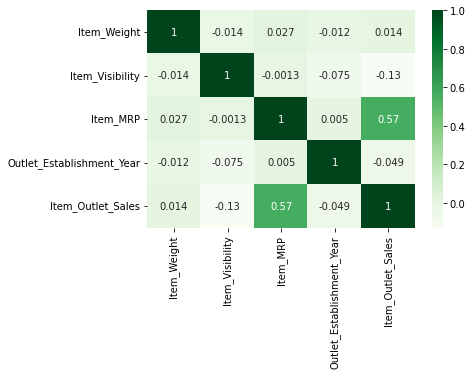

In [28]:
# Display correlation between features
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

## Explanatory Visuals